In [1]:
from core.data_loader import DataLoader
from spine.data_loader import SpineDataLoader
from core.viz_util import plot_2ax_image_and_mask_superimposed
import segmentation_models as sm


Using TensorFlow backend.
/Users/jesse/miniconda3/envs/vision/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Segmentation Models: using `keras` framework.


In [2]:
sdl = SpineDataLoader(dirpath_data='/Users/jesse/Downloads/coding_challenge/', batch_size=2)

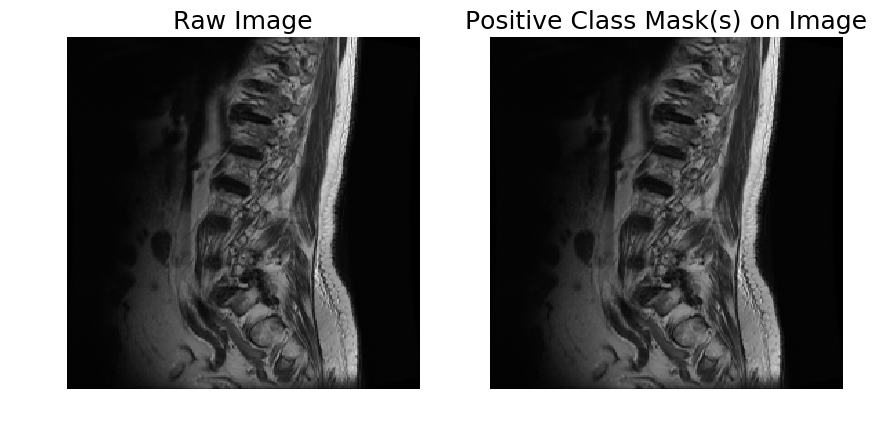

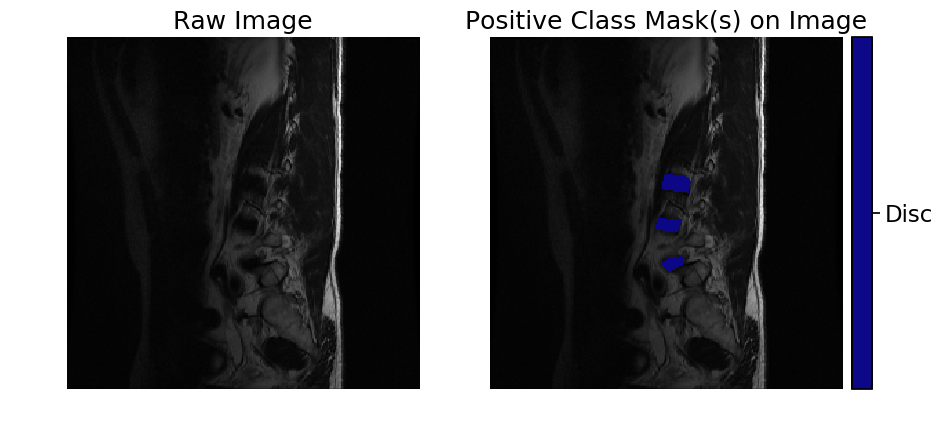

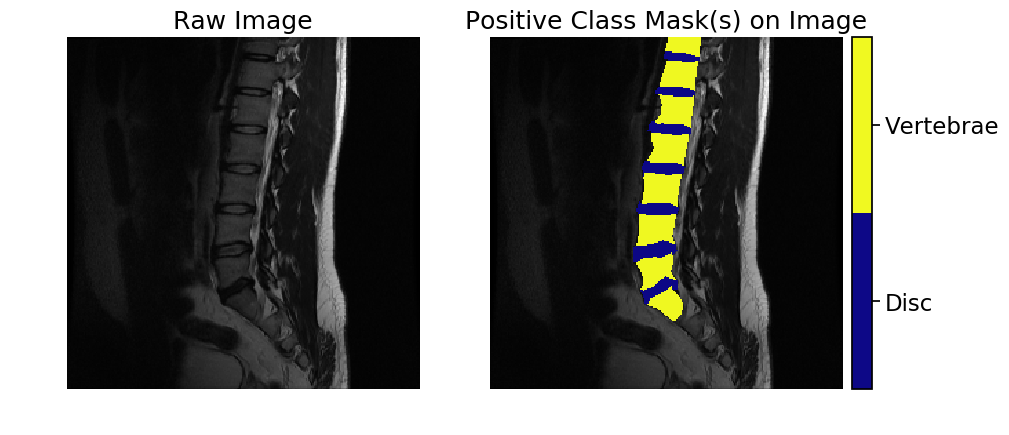

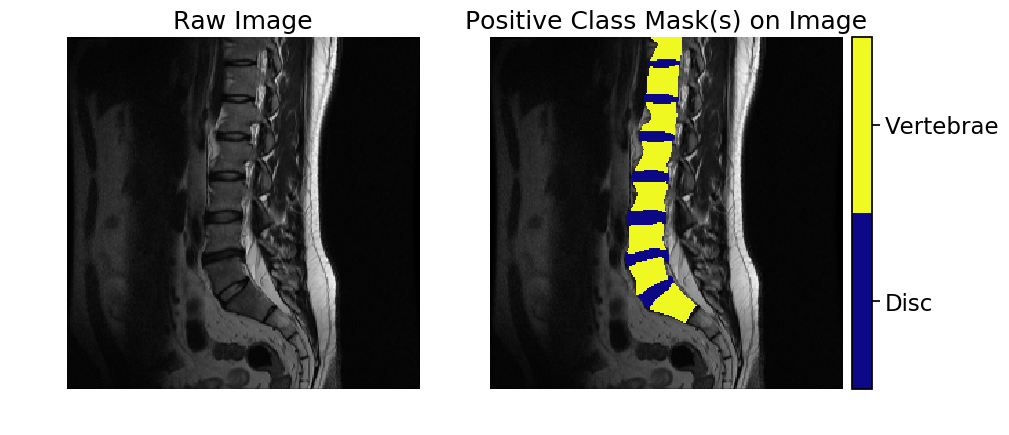

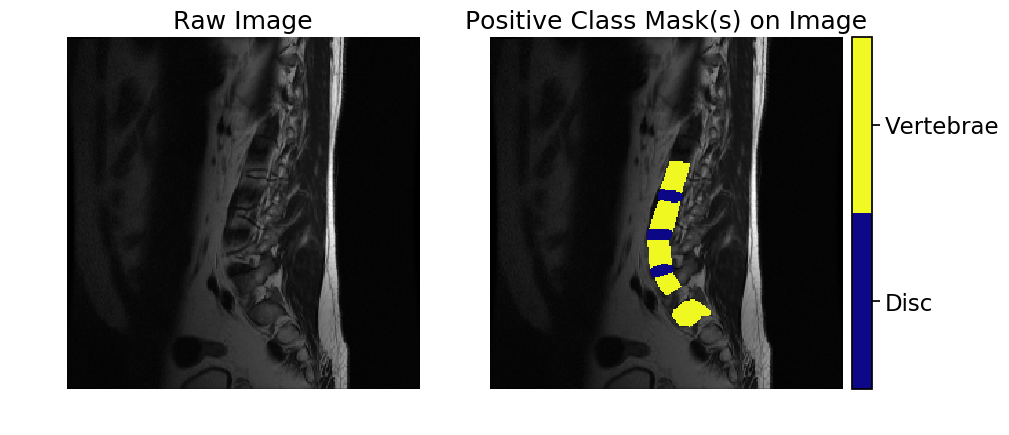

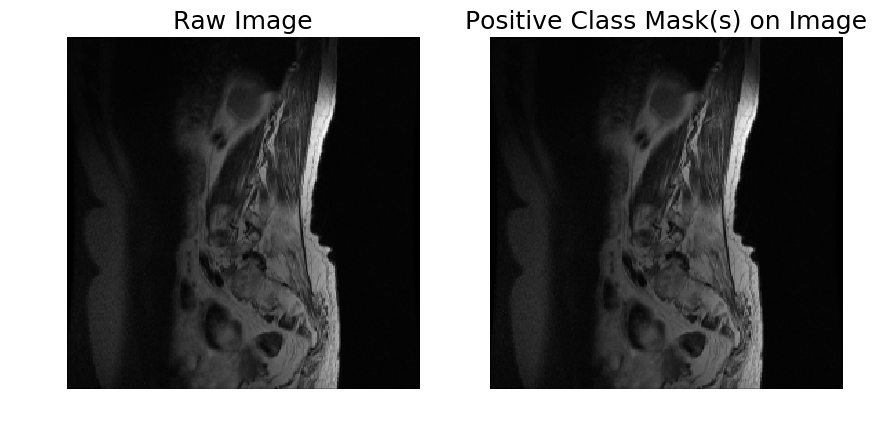

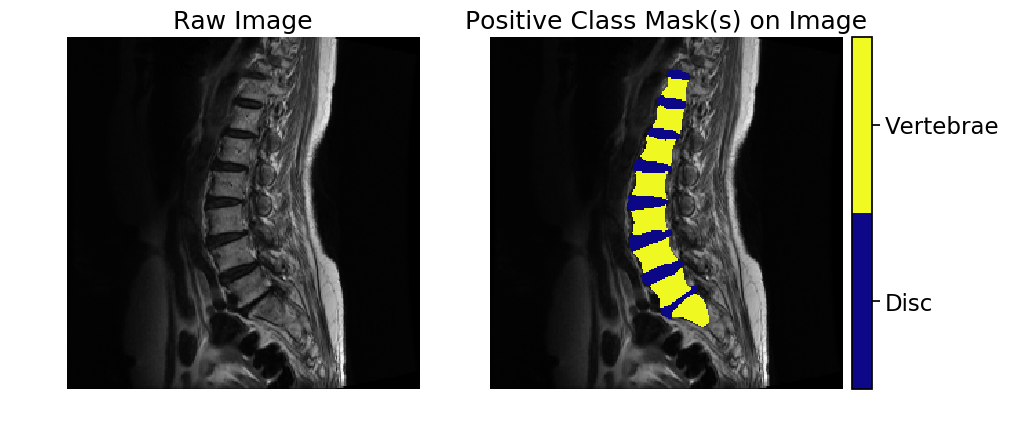

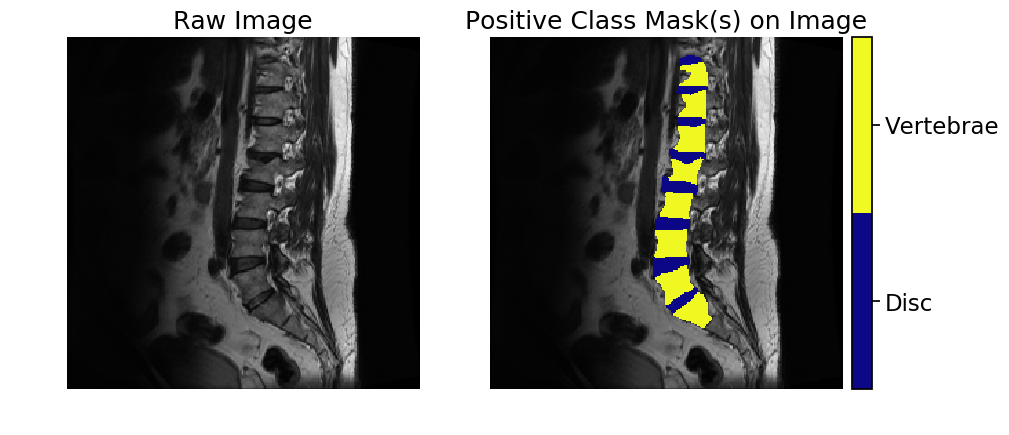

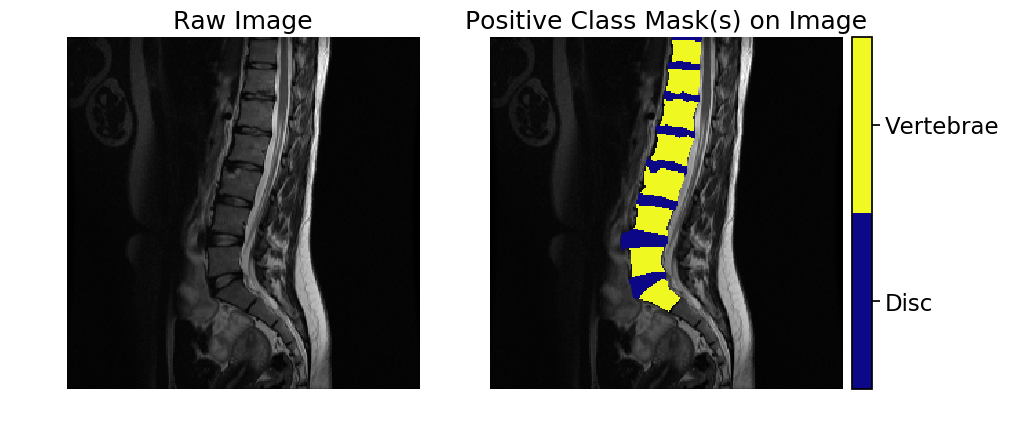

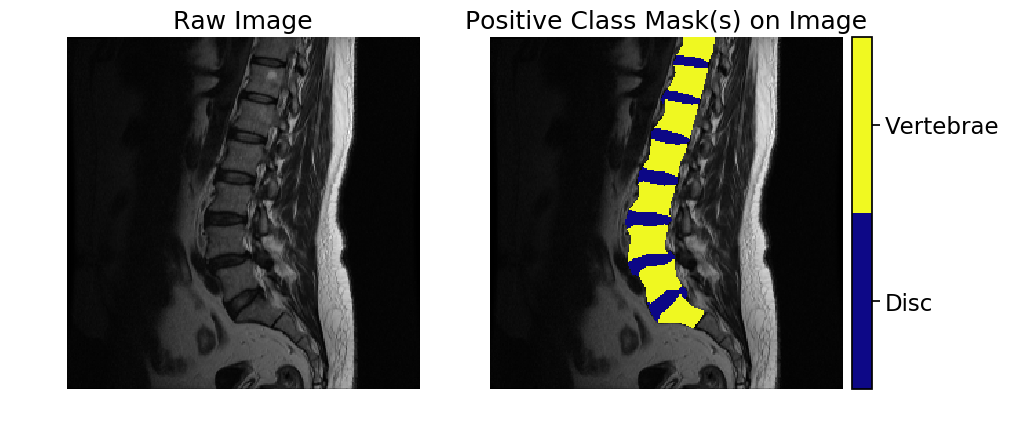

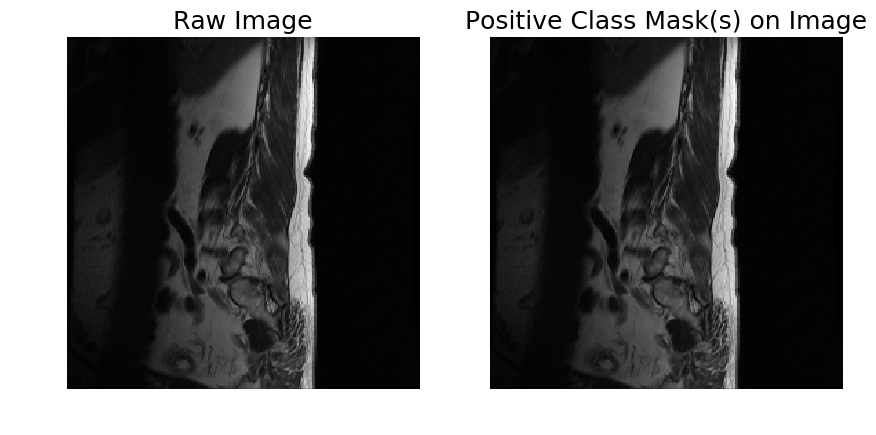

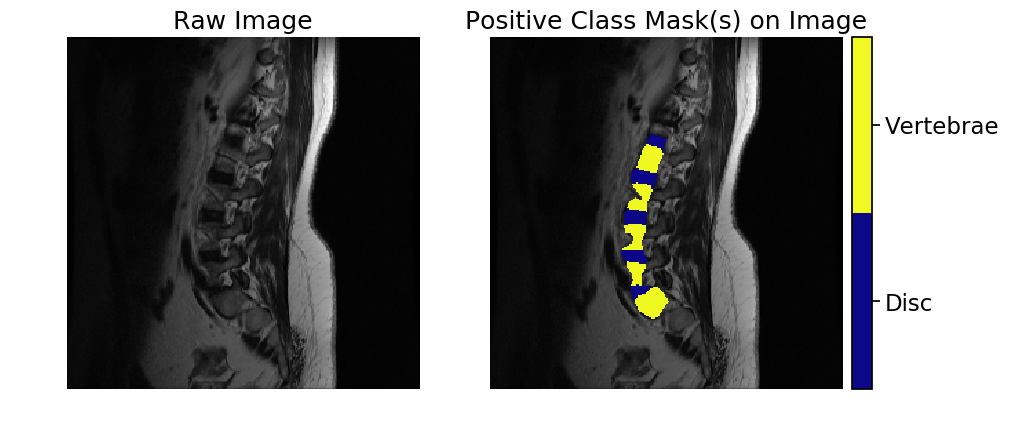

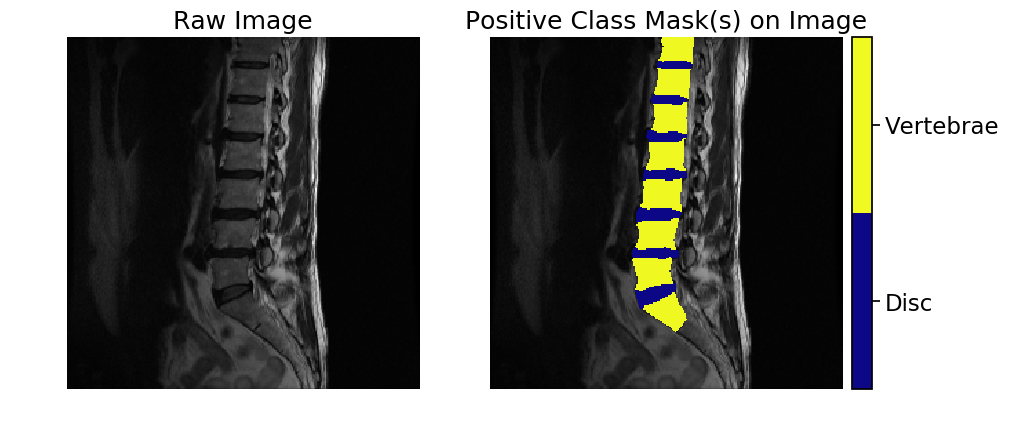

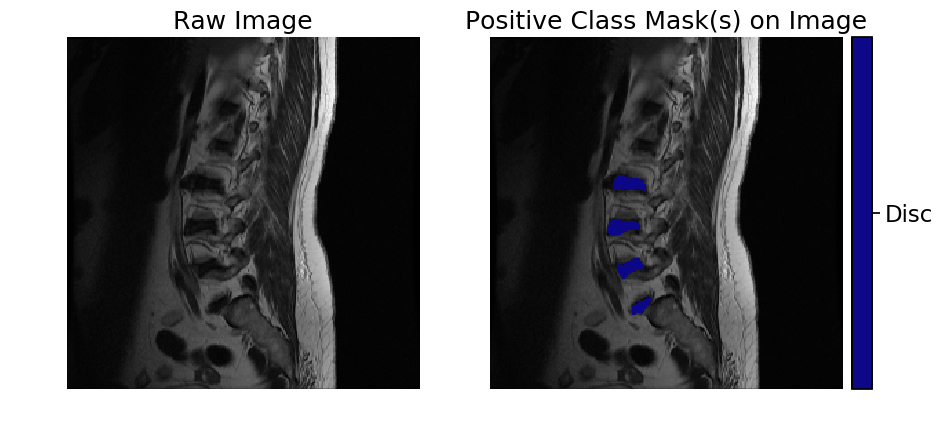

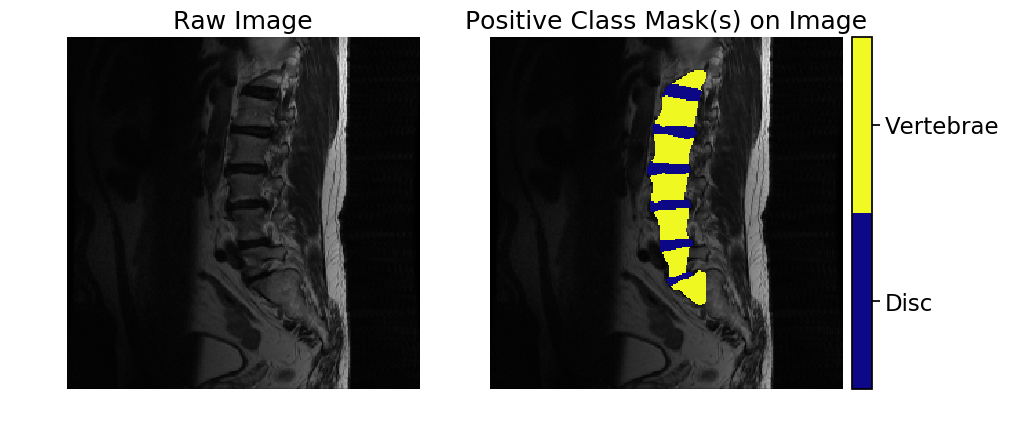

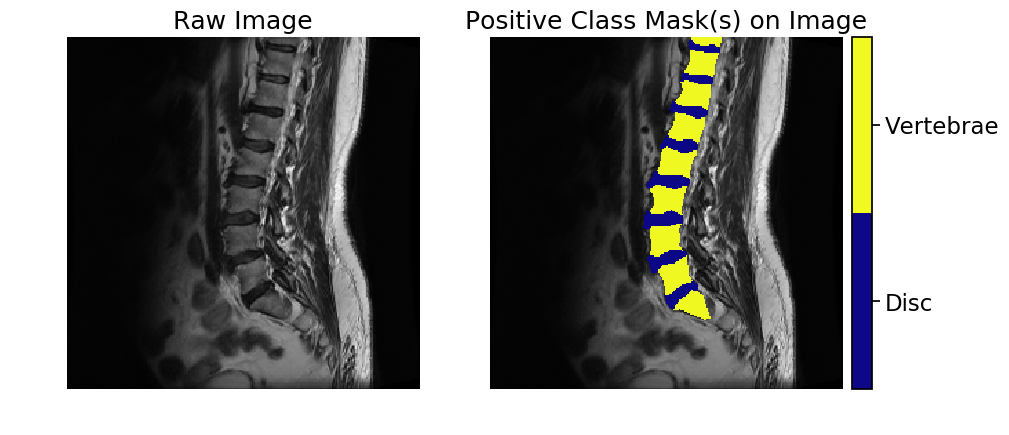

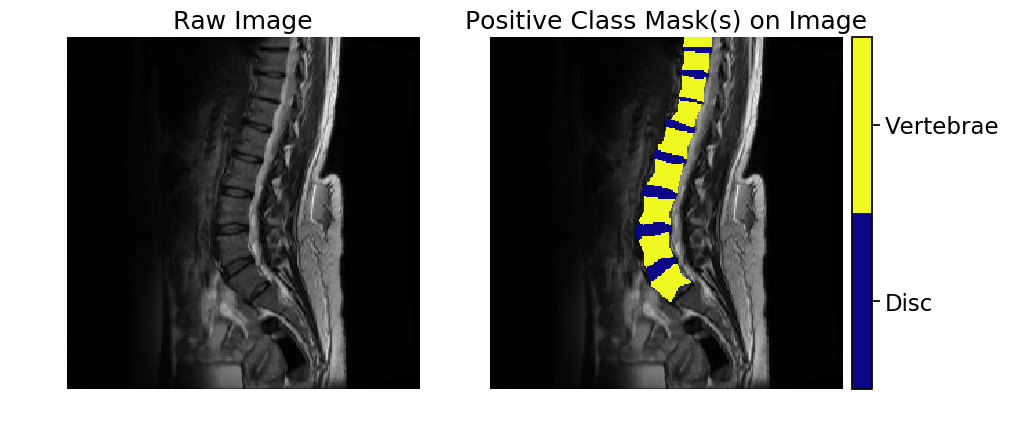

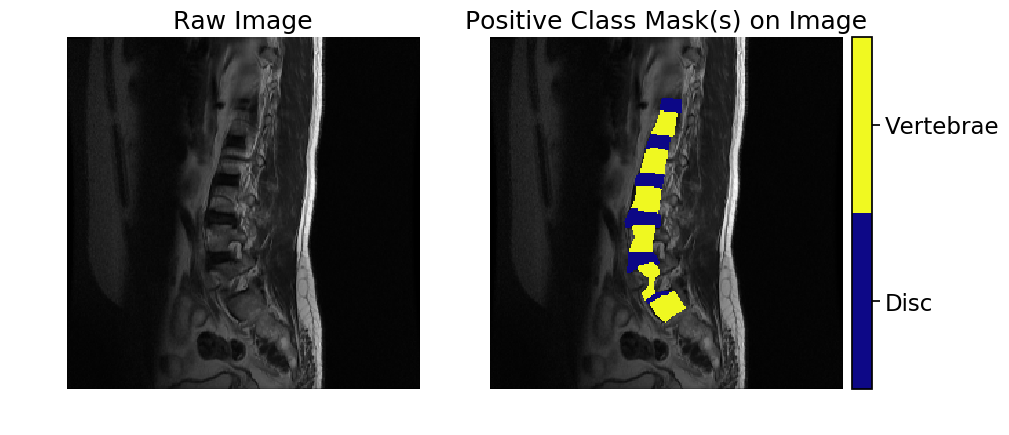

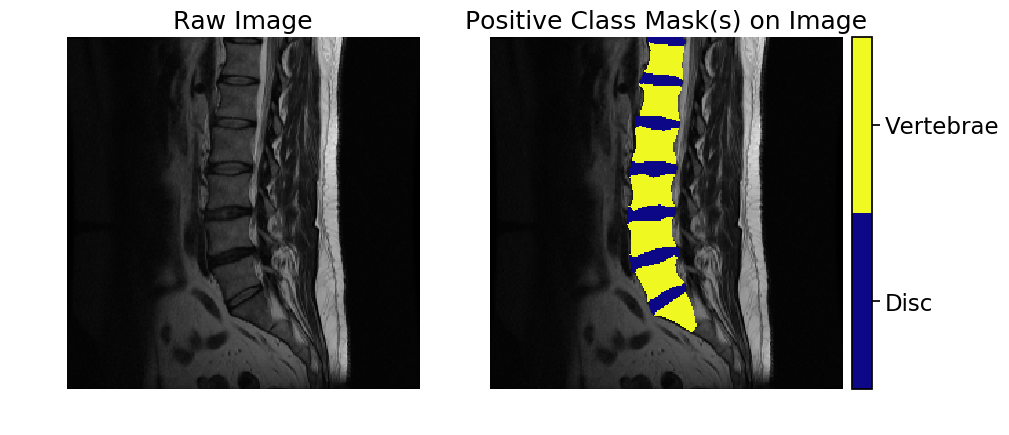

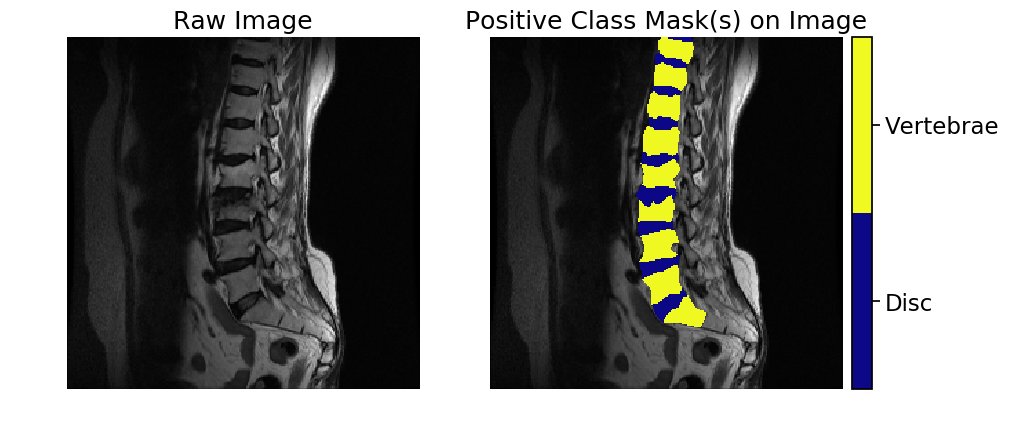

In [3]:
# Visualize all 20 examples for a quick spot check using get_mask and get_image methods
# Filter warning that comes up in the masking code
import warnings
warnings.simplefilter("ignore", UserWarning)
tick_labels = ['Disc', 'Vertebrae']
for i in range(20):
    image = sdl.get_image(str(i))
    mask = sdl.get_mask(str(i))
    plot_2ax_image_and_mask_superimposed(image, mask, tick_labels)

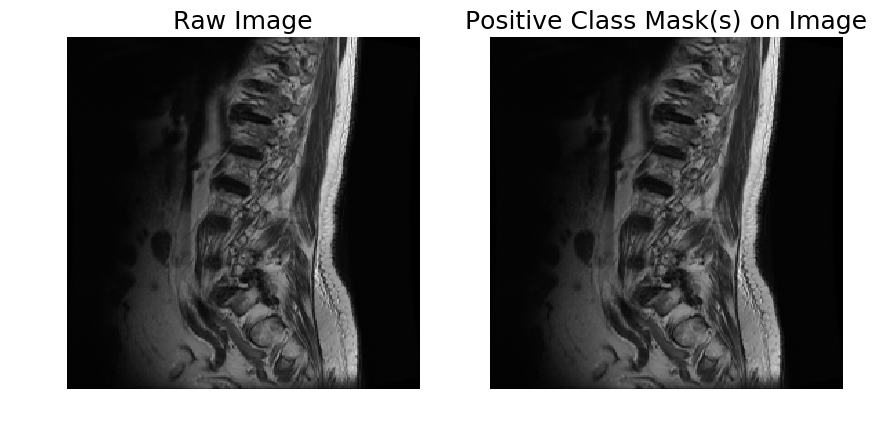

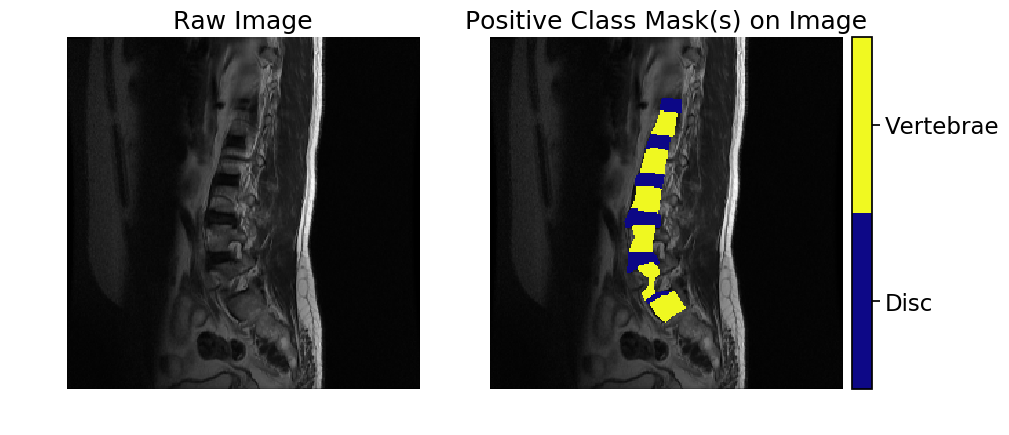

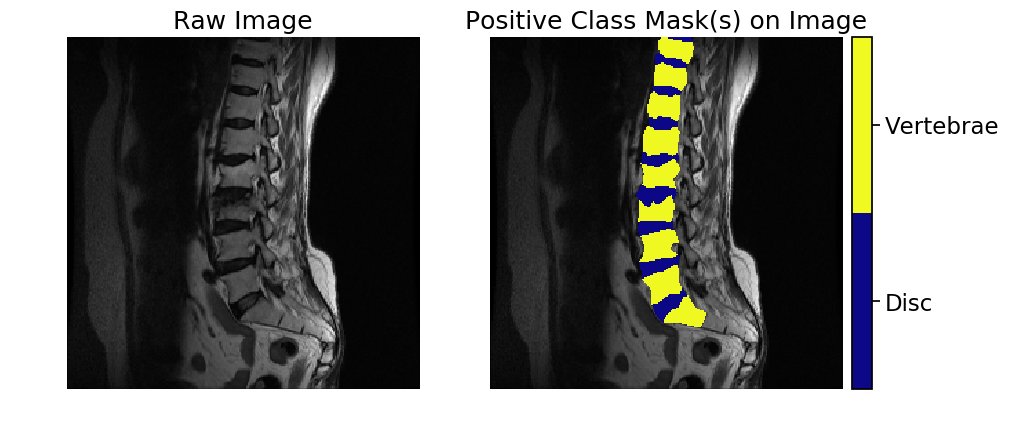

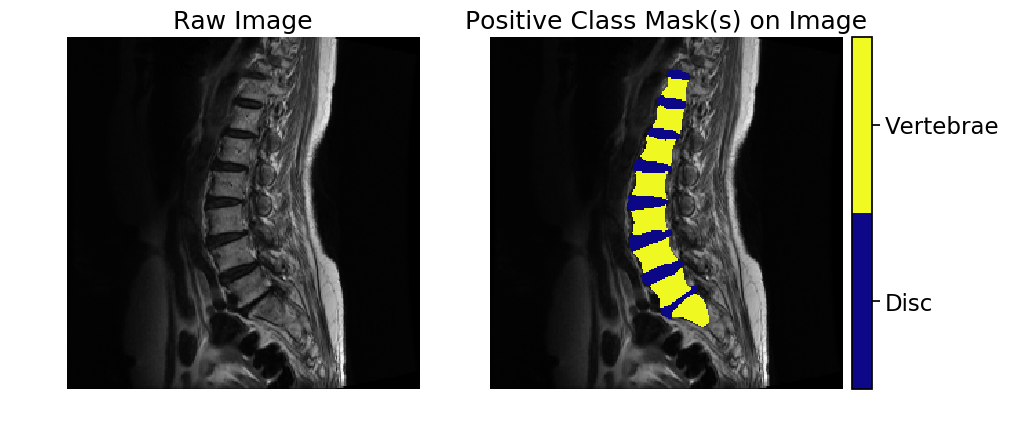

In [4]:
# Visualize two batches worth of examples to visually verify the get_batch method
counter = 0
for images, masks in sdl.get_batch(set_name='train'):
    for image, mask in zip(images, masks):
        plot_2ax_image_and_mask_superimposed(image, mask, tick_labels)
    counter += 1
    if counter == 2:
        break

In [ ]:
# Implement the data generator in a Keras UNet 

model = sm.Unet('resnet34', classes=3, input_shape=(None, None, 1), encoder_weights=None)
model.compile('Adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score])

train_iter = sdl.get_batch(set_name='train')
val_iter = sdl.get_batch(set_name='val')
model.fit_generator(generator=train_iter,
                    epochs=2,
                    verbose=True,
                    steps_per_epoch=sdl.num_train_steps,
                    validation_steps=sdl.num_val_steps,
                    validation_data=val_iter)



Epoch 1/2
6/6 [==============================] - 52s 9s/step - loss: 1.7065 - iou_score: 0.0908 - val_loss: 5.5749 - val_iou_score: 0.0387
Epoch 2/2
1/6 [====>.........................] - ETA: 33s - loss: 1.6714 - iou_score: 0.0352